In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Acc_Data_no_hotencode.csv')

In [ ]:
df.shape

(635523, 9)

In [ ]:
df.head()

,Accident_Severity,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Serious,Darkness,1,2,Dry,Single_carriageway,Urban,Fine,Car
1,Serious,Daylight,1,2,Wet_or_damp,Single_carriageway,Urban,Raining,Car
2,Serious,Daylight,1,4,Dry,Single_carriageway,Urban,Fine,Passenger_Vehicles(Minibus_or_Bus)
3,Serious,Daylight,2,3,Dry,Single_carriageway,Urban,Fine,Car
4,Serious,Daylight,1,2,Dry,Dual_carriageway,Urban,Fine,Goods_Carrier


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635523 entries, 0 to 635522
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Accident_Severity        635523 non-null  object
 1   Light_Conditions         635523 non-null  object
 2   Number_of_Casualties     635523 non-null  int64 
 3   Number_of_Vehicles       635523 non-null  int64 
 4   Road_Surface_Conditions  635523 non-null  object
 5   Road_Type                635523 non-null  object
 6   Urban_or_Rural_Area      635523 non-null  object
 7   Weather_Conditions       635523 non-null  object
 8   Vehicle_Type             635523 non-null  object
dtypes: int64(2), object(7)
memory usage: 43.6+ MB


Encoding with label encoder

In [ ]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'Accident_Severity': 2,
 'Light_Conditions': 2,
 'Road_Surface_Conditions': 3,
 'Road_Type': 4,
 'Urban_or_Rural_Area': 2,
 'Weather_Conditions': 3,
 'Vehicle_Type': 5}

In [ ]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding on columns
df[['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']] = df[['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,Accident_Severity,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Serious,0,1,2,0,3,1,0,1
1,Serious,1,1,2,2,3,1,1,1
2,Serious,1,1,4,0,3,1,0,4
3,Serious,1,2,3,0,3,1,0,1
4,Serious,1,1,2,0,0,1,0,2


Test / train split

In [ ]:
target = 'Accident_Severity'

In [ ]:
y = df[target].copy()
X = df.drop(columns=[target]).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accident_Severity
Slight     541222
Serious     94301
Name: count, dtype: int64


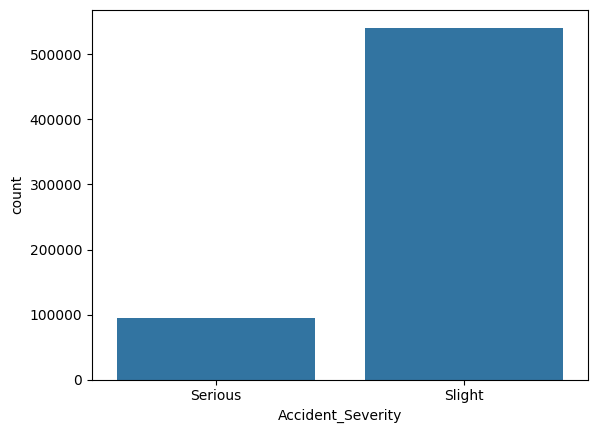

In [ ]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

Random Forest without Sampling

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# performance evaluation metrics
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

     Serious       0.01      0.39      0.02       842
      Slight       1.00      0.85      0.92    189815

    accuracy                           0.85    190657
   macro avg       0.50      0.62      0.47    190657
weighted avg       0.99      0.85      0.92    190657



Random Forest with Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under = RandomUnderSampler(sampling_strategy=0.5)
X_train, y_train= under.fit_resample(X_train, y_train)

over = RandomOverSampler(sampling_strategy=0.8)
X_train, y_train= over.fit_resample(X_train, y_train)

In [ ]:
unique, count = np.unique(y_train, return_counts=True)
y_train_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_value_count

{'Serious': 105972, 'Slight': 132466}

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# performance evaluation metrics
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

     Serious       0.52      0.23      0.31     64538
      Slight       0.69      0.89      0.78    126119

    accuracy                           0.67    190657
   macro avg       0.60      0.56      0.55    190657
weighted avg       0.63      0.67      0.62    190657



Parameter optimization

In [ ]:
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
						param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=50)


In [ ]:
model_grid_opt = RandomForestClassifier(max_depth=6,
									max_leaf_nodes=9,
									n_estimators=50)
model_grid_opt.fit(X_train, y_train)
y_pred_grid_opt = model_grid_opt.predict(X_test)
print(classification_report(y_pred_grid_opt, y_test))

              precision    recall  f1-score   support

     Serious       0.28      0.26      0.27     30575
      Slight       0.86      0.87      0.87    160082

    accuracy                           0.77    190657
   macro avg       0.57      0.56      0.57    190657
weighted avg       0.77      0.77      0.77    190657

